In [1]:
import pandas as pd

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df = pd.read_csv("/content/drive/MyDrive/ML_BD/customer_loyalty_score_data.csv")

In [11]:
df.head()

,purchase_frequency,avg_order_value,customer_satisfaction,customer_age,customer_gender,net_promoter_score,engagement_level,loyalty_program_membership,age_group,customer_loyalty_score
0,1.0,50.0,4.0,28.0,female,2.0,low,YES,NaN,76
1,4.0,125.0,5.0,48.0,female,0.0,high,NO,46-55,67
2,7.0,NaN,1.0,27.0,male,5.0,low,YES,26-35,80
3,5.0,50.0,1.0,66.0,female,9.0,low,NO,66-70,50
4,NaN,125.0,8.0,65.0,male,1.0,NaN,NO,56-65,61


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   purchase_frequency          900 non-null    float64
 1   avg_order_value             900 non-null    float64
 2   customer_satisfaction       900 non-null    float64
 3   customer_age                901 non-null    float64
 4   customer_gender             900 non-null    object 
 5   net_promoter_score          900 non-null    float64
 6   engagement_level            900 non-null    object 
 7   loyalty_program_membership  998 non-null    object 
 8   age_group                   884 non-null    object 
 9   customer_loyalty_score      1000 non-null   int64  
dtypes: float64(5), int64(1), object(4)
memory usage: 78.2+ KB


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
purchase_frequency,900.0,5.610000,2.909864,1.0,3.0,6.0,8.0,10.0
avg_order_value,900.0,143.027778,72.242595,25.0,75.0,150.0,200.0,250.0
customer_satisfaction,900.0,5.400000,2.933069,1.0,3.0,5.0,8.0,10.0
customer_age,901.0,43.677026,15.145334,18.0,30.0,44.0,56.0,102.0
net_promoter_score,900.0,5.031111,3.130305,0.0,2.0,5.0,8.0,10.0
customer_loyalty_score,1000.0,50.990000,20.744644,0.0,36.0,51.0,66.0,100.0


Summary Statistics for Categoricall Data

In [14]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col}: \n {df[col].value_counts()}\n")

customer_gender: 
 customer_gender
male      478
female    422
Name: count, dtype: int64

engagement_level: 
 engagement_level
low       313
high      298
medium    289
Name: count, dtype: int64

loyalty_program_membership: 
 loyalty_program_membership
NO     541
YES    457
Name: count, dtype: int64

age_group: 
 age_group
46-55    177
26-35    172
56-65    169
36-45    168
18-25    134
66-70     64
Name: count, dtype: int64



Drop columns that are not needed

In [15]:
df.drop('age_group', axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   purchase_frequency          900 non-null    float64
 1   avg_order_value             900 non-null    float64
 2   customer_satisfaction       900 non-null    float64
 3   customer_age                901 non-null    float64
 4   customer_gender             900 non-null    object 
 5   net_promoter_score          900 non-null    float64
 6   engagement_level            900 non-null    object 
 7   loyalty_program_membership  998 non-null    object 
 8   customer_loyalty_score      1000 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 70.4+ KB


Fill Null Values with mean values

In [16]:
for col in df.select_dtypes(include=['int','float']).columns:
  df[col].fillna(df[col].mean(),inplace=True)


In [17]:
df.describe()

,purchase_frequency,avg_order_value,customer_satisfaction,customer_age,net_promoter_score,customer_loyalty_score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.610000,143.027778,5.400000,43.677026,5.031111,50.990000
std,2.760386,68.531532,2.782399,14.375314,2.969503,20.744644
min,1.000000,25.000000,1.000000,18.000000,0.000000,0.000000
25%,3.000000,100.000000,3.000000,32.000000,3.000000,36.000000
50%,5.610000,143.027778,5.400000,43.677026,5.031111,51.000000
75%,8.000000,200.000000,8.000000,55.000000,7.000000,66.000000
max,10.000000,250.000000,10.000000,102.000000,10.000000,100.000000


Fill Null Values of Categorical Data with 0

In [18]:
for col in df.select_dtypes(include='object').columns:
  df[col].fillna(df[col].mode()[0],inplace=True)

In [19]:
for col in df.select_dtypes(include='object').columns:
  print(f"{col}: \n {df[col].value_counts()}\n")

customer_gender: 
 customer_gender
male      578
female    422
Name: count, dtype: int64

engagement_level: 
 engagement_level
low       413
high      298
medium    289
Name: count, dtype: int64

loyalty_program_membership: 
 loyalty_program_membership
NO     543
YES    457
Name: count, dtype: int64



Display a box plot for Customer Age to Identify Outliers

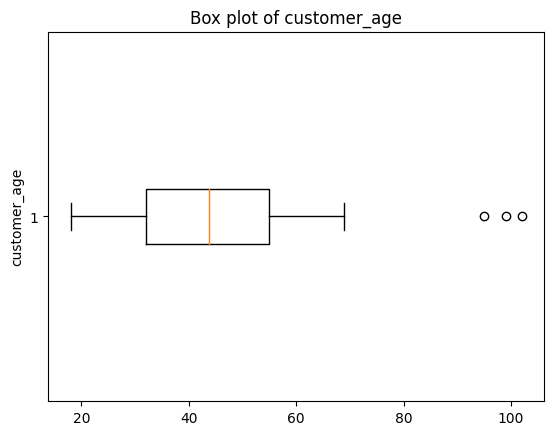

count    1000.000000
mean       43.677026
std        14.375314
min        18.000000
25%        32.000000
50%        43.677026
75%        55.000000
max       102.000000
Name: customer_age, dtype: float64 



In [20]:
import matplotlib.pyplot as plt

plt.boxplot(df['customer_age'],vert=False)
plt.title('Box plot of customer_age')
plt.ylabel('customer_age')
plt.show()
print(df.customer_age.describe(),'\n')

Removing Outliers with z-score to detect and remove the extreme values

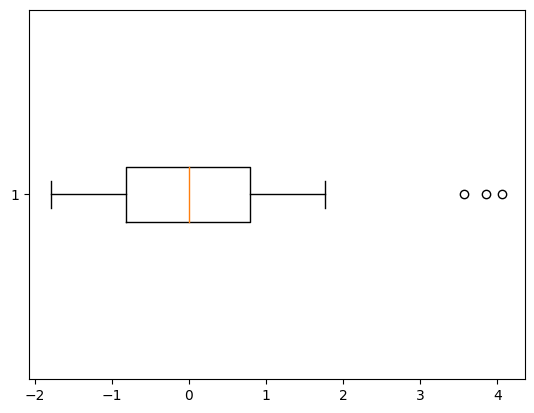

In [23]:
from scipy import stats

# Calculate Z-score for customer_age column
z_scores = stats.zscore(df['customer_age'])
plt.boxplot(z_scores,vert=False)

# Reatin rows with Z-score greater than -3 or less than +3
df = df[(z_scores >= -3) & (z_scores <= 3)]

Redisplay plot

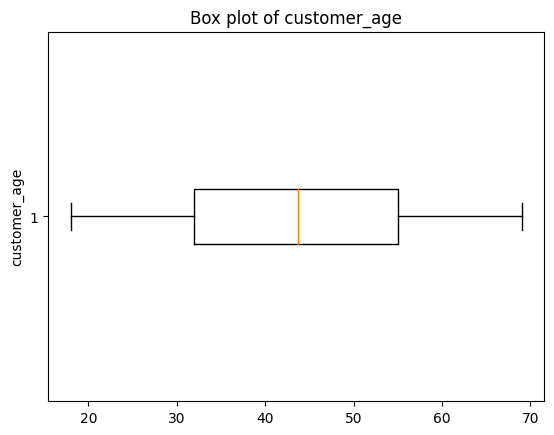

count    997.000000
mean      43.511560
std       14.075224
min       18.000000
25%       32.000000
50%       43.677026
75%       55.000000
max       69.000000
Name: customer_age, dtype: float64 



In [24]:
import matplotlib.pyplot as plt

plt.boxplot(df['customer_age'],vert=False)
plt.title('Box plot of customer_age')
plt.ylabel('customer_age')
plt.show()
print(df.customer_age.describe(),'\n')

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
purchase_frequency,997.0,5.610832,2.759288,1.0,3.0,5.610000,8.0,10.0
avg_order_value,997.0,142.988716,68.608531,25.0,100.0,143.027778,200.0,250.0
customer_satisfaction,997.0,5.400201,2.780331,1.0,3.0,5.400000,8.0,10.0
customer_age,997.0,43.511560,14.075224,18.0,32.0,43.677026,55.0,69.0
net_promoter_score,997.0,5.034214,2.966332,0.0,3.0,5.031111,7.0,10.0
customer_loyalty_score,997.0,51.014042,20.764984,0.0,36.0,51.000000,66.0,100.0


Convert Categorical variables to Dummy variables

In [27]:
df = pd.get_dummies(df, drop_first=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 0 to 996
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   purchase_frequency              997 non-null    float64
 1   avg_order_value                 997 non-null    float64
 2   customer_satisfaction           997 non-null    float64
 3   customer_age                    997 non-null    float64
 4   net_promoter_score              997 non-null    float64
 5   customer_loyalty_score          997 non-null    int64  
 6   customer_gender_female          997 non-null    bool   
 7   customer_gender_male            997 non-null    bool   
 8   engagement_level_high           997 non-null    bool   
 9   engagement_level_low            997 non-null    bool   
 10  engagement_level_medium         997 non-null    bool   
 11  loyalty_program_membership_NO   997 non-null    bool   
 12  loyalty_program_membership_YES  997 non-n

In [28]:
df.columns

Index(['purchase_frequency', 'avg_order_value', 'customer_satisfaction',
       'customer_age', 'net_promoter_score', 'customer_loyalty_score',
       'customer_gender_female', 'customer_gender_male',
       'engagement_level_high', 'engagement_level_low',
       'engagement_level_medium', 'loyalty_program_membership_NO',
       'loyalty_program_membership_YES'],
      dtype='object')

Standardization

In [33]:
from sklearn.preprocessing import StandardScaler

# Separate the dummy variables from the numerical variables
dummy_cols = df.select_dtypes(include='uint8').columns
num_cols = list(set(df.select_dtypes(include=['float64', 'int64']).columns) - set(dummy_cols))

# Standardize the numerical variables
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Combine the standardized numerical variables with the dummy variables
df_std = pd.concat([df[num_cols], df[dummy_cols]], axis=1)

df_std.head(5)


,avg_order_value,customer_satisfaction,net_promoter_score,purchase_frequency,customer_loyalty_score,customer_age
0,-1.356032,-0.503862,-1.023397,-1.671862,1.203878,-1.102600
1,-0.262325,-0.144012,-1.697969,-0.584079,0.770238,0.319049
2,0.000570,-1.583412,-0.011540,0.503704,1.396606,-1.173683
3,-1.356032,-1.583412,1.337604,-0.221484,-0.048859,1.598534
4,-0.262325,0.935538,-1.360683,-0.000302,0.481145,1.527452


In [34]:
df_std.describe()

,avg_order_value,customer_satisfaction,net_promoter_score,purchase_frequency,customer_loyalty_score,customer_age
count,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02
mean,-7.126808e-18,2.316213e-17,-3.385234e-17,-2.850723e-17,-2.405298e-17,-1.425362e-17
std,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00
min,-1.720601e+00,-1.583412e+00,-1.697969e+00,-1.671862e+00,-2.457967e+00,-1.813425e+00
25%,-6.268942e-01,-8.637120e-01,-6.861115e-01,-9.466729e-01,-7.234091e-01,-8.182703e-01
50%,5.696264e-04,-7.218654e-05,-1.046477e-03,-3.018588e-04,-6.765801e-04,1.176169e-02
75%,8.313820e-01,9.355376e-01,6.630319e-01,8.662985e-01,7.220559e-01,8.166269e-01
max,1.560520e+00,1.655237e+00,1.674889e+00,1.591487e+00,2.360250e+00,1.811782e+00


Splitting Data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_std.drop('customer_loyalty_score', axis=1), df['customer_loyalty_score'], test_size=0.2, random_state=50)

Neural network bit-Libraries

In [37]:
!pip install scikeras

In [38]:
import scikeras as sk
from sklearn.metrics import mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

In [41]:
X_train.shape

(797, 5)

#Model Architecture#
* Loss Function: A loss function in a neural network is a mathematical function that measures the difference between the network’s predicted output and the actual target values. It quantifies how well the neural network is performing its task, with a lower value indicating better performance. The loss function guides the optimization algorithm by providing a measure to minimize during the training process.

* Optimizer: An optimizer in a neural network is an algorithm or method used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. Optimizers are used to solve optimization problems by minimizing the function that represents the error of the neural network. However, the choice of optimizer can significantly affect the speed and quality of the training process.

In [44]:
#Model Architecture Function
def create_model():
  model =Sequential()
  #Input Layer with 32 neurons , number of features in the X_train and Activation Function
  model.add(Dense(32,input_dim=X_train.shape[1],activation='relu'))
  #Hidden Layer does not require number of features as input layer will supply inpus to this layer
  #You can define as many layers as possible based on task
  model.add(Dense(16,activation='relu'))
  #Another layer
  model.add(Dense(8,activation='sigmoid'))
  #Output layer has only 1 Neuron
  model.add(Dense(1,activation='linear'))


  model.compile(loss='mean_squared_error',optimizer='adam')
  return model


#Create Model
model=KerasRegressor(build_fn=create_model,verbose=0)
print(model)

KerasRegressor(
	model=None
	build_fn=<function create_model at 0x799ff7c9e560>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)


#FIND BEST PARAMETERS USING GRID SEARCH#
GRID SEARCH PARAMETERS


* estimator=model: This is the machine learning model you want to tune. The estimator parameter takes the model instance.
* param_grid=param_grid: This is a dictionary or list of dictionaries that specify the hyperparameters to try.The param_grid defines the parameter grid that GridSearchCV will search over.
* cv=3: The cv parameter stands for cross-validation. It determines the cross-validation splitting strategy used to evaluate each set of hyperparameters. Here, cv=3 means that a 3-fold cross-validation is used, where the data is split into three parts, two of which are used for training and one for validation, and this process is repeated three times.
* n_jobs=-1: This parameter specifies the number of jobs to run in parallel for the search. Setting n_jobs=-1 means using all available processors to parallelize the search and speed up computation.

In [49]:
# define the grid search parameters
param_griddder = {'batch_size': [32, 64],'epochs': [50, 100],   'optimizer': ['adam', 'sgd']}

param_grid = {'batch_size': [32, 64, 128],
              'epochs': [50, 100, 150],
              'optimizer': ['adam', 'sgd', 'Adamax']}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)

grid_result=grid.fit(X_train,y_train)

# print the best parameters
print(f"Best Parameters: {grid_result.best_params_}")



/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Best Parameters: {'batch_size': 32, 'epochs': 150, 'optimizer': 'adam'}


Fir the model with best parameter values for implementation on th test set

In [50]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], verbose=0, callbacks=[EarlyStopping(patience=10, restore_best_weights=True)])

# Y predict on X test set
y_pred = best_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Find Performance Metrics

In [51]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.14908484286246312
R-squared: 0.8585025820942865


Feature Importance plot

net_promoter_score: 1.2662080526351929
avg_order_value: 0.7122828960418701
customer_age: 0.4622158110141754
customer_satisfaction: 0.3535443842411041
purchase_frequency: 0.05466851592063904


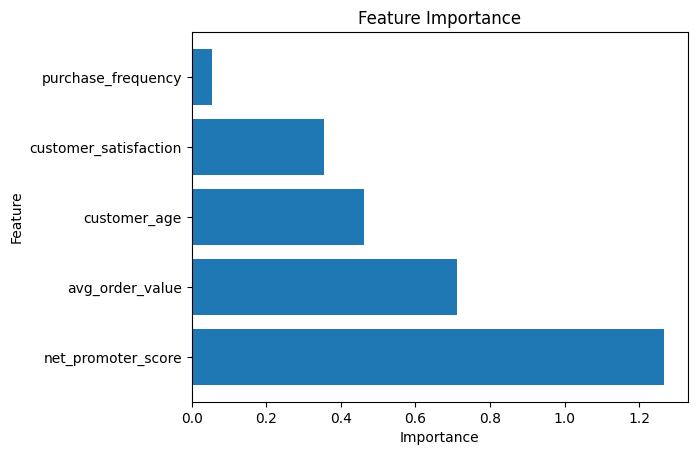

In [52]:
import numpy as np

importance = best_model.predict(X_train, verbose=0)
importance = np.squeeze(importance)
feature_names = X_train.columns
feature_importance = dict(zip(feature_names, importance))
sorted_importance = sorted(feature_importance.items(), key=lambda kv: abs(kv[1]), reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {abs(importance)}")

importance_values = [abs(kv[1]) for kv in sorted_importance]
#print(importance_values)
feature_names = [kv[0] for kv in sorted_importance]
#print(feature_names)

plt.barh(range(len(importance_values)), importance_values, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()